In [1]:
#Author:  SYH & SXK
#DATE:    2018.9.4
#TASK:    NN with SA

#Restructured from CS231n assignment1


In [1]:
#Setup

import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline

random_seed = 0


In [2]:
from head.data_utils import load_CIFAR10


#Load Data

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    
    cifar10_dir = 'datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [5]:
#Network Settings

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10


## Experiment of alternative training using SGD and SA

In SA, W1 and b1 are fixed.
Multiply T during exploration is better.

In [10]:
#Training use SGD 
#Test set accuracy around 50%

from head.neural_net import TwoLayerNet

np.random.seed(random_seed)

#Training hyperparams
batch_size = 236
learning_rate = 5e-4
reg = 0.1

net_bp = TwoLayerNet(input_size, hidden_size, num_classes)
stats_bp = net_bp.train_bp(X_train, y_train, X_val, y_val,
                num_iters=2000, batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=True)

test_acc = (net_bp.predict(X_test) == y_test).mean()

print('Test accuracy: ', test_acc)

iteration 0 / 2000: loss 2.302747
iteration 100 / 2000: loss 2.151115
iteration 200 / 2000: loss 1.956375
iteration 300 / 2000: loss 1.795100
iteration 400 / 2000: loss 1.650096
iteration 500 / 2000: loss 1.788248
iteration 600 / 2000: loss 1.632312
iteration 700 / 2000: loss 1.725397
iteration 800 / 2000: loss 1.546313
iteration 900 / 2000: loss 1.617557
iteration 1000 / 2000: loss 1.605412
iteration 1100 / 2000: loss 1.411051
iteration 1200 / 2000: loss 1.647157
iteration 1300 / 2000: loss 1.290863
iteration 1400 / 2000: loss 1.594383
iteration 1500 / 2000: loss 1.539742
iteration 1600 / 2000: loss 1.498160
iteration 1700 / 2000: loss 1.507776
iteration 1800 / 2000: loss 1.503318
iteration 1900 / 2000: loss 1.481487
Test accuracy:  0.491


In [12]:
#Training hyperparameters
batch_size = 236
step_len = 0.001
reg = 0.1

#net_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_sa = net_bp.train_sa(X_train, y_train, X_val, y_val,
        num_iters=1000, batch_size=batch_size, step_len = step_len,
        reg=reg, T_max = 0.1, T_min = 0.005, verbose=True)

test_acc = (net_bp.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

E:\Documents\1资料\Brainmatrix\模拟退火\CBICR_contest\Source\head\neural_net.py:175: RuntimeWarning: overflow encountered in exp
  ratio = np.exp((loss_past - loss_new) / T)


iteration 0 / 1000: loss 1.473559
Reject: 0   Accept: 1
iteration 100 / 1000: loss 1.291111
Reject: 44   Accept: 57
iteration 200 / 1000: loss 1.318650
Reject: 100   Accept: 101
iteration 300 / 1000: loss 1.403399
Reject: 165   Accept: 136
iteration 400 / 1000: loss 1.307760
Reject: 237   Accept: 164
iteration 500 / 1000: loss 1.297264
Reject: 322   Accept: 179
iteration 600 / 1000: loss 1.270016
Reject: 418   Accept: 183
iteration 700 / 1000: loss 1.200882
Reject: 517   Accept: 184
iteration 800 / 1000: loss 1.200882
Reject: 617   Accept: 184
iteration 900 / 1000: loss 1.200882
Reject: 717   Accept: 184
Test accuracy:  0.492


In [13]:
#net_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_bp2 = net_bp.train_bp(X_train, y_train, X_val, y_val,
                num_iters=1000, batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=True)

test_acc = (net_bp.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 1000: loss 1.424908
iteration 100 / 1000: loss 1.423528
iteration 200 / 1000: loss 1.352588
iteration 300 / 1000: loss 1.447310
iteration 400 / 1000: loss 1.420273
iteration 500 / 1000: loss 1.513390
iteration 600 / 1000: loss 1.486947
iteration 700 / 1000: loss 1.446780
iteration 800 / 1000: loss 1.401696
iteration 900 / 1000: loss 1.433270
Test accuracy:  0.511


In [14]:
#Training hyperparameters
batch_size = 236
step_len = 0.001
reg = 0.1

#net_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_sa = net_bp.train_sa(X_train, y_train, X_val, y_val,
        num_iters=1000, batch_size=batch_size, step_len = step_len,
        reg=reg, T_max = 0.1, T_min = 0.005, verbose=True)

test_acc = (net_bp.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

E:\Documents\1资料\Brainmatrix\模拟退火\CBICR_contest\Source\head\neural_net.py:175: RuntimeWarning: overflow encountered in exp
  ratio = np.exp((loss_past - loss_new) / T)


iteration 0 / 1000: loss 1.313374
Reject: 0   Accept: 1
iteration 100 / 1000: loss 1.373535
Reject: 36   Accept: 65
iteration 200 / 1000: loss 1.400866
Reject: 87   Accept: 114
iteration 300 / 1000: loss 1.297289
Reject: 165   Accept: 136
iteration 400 / 1000: loss 1.306708
Reject: 245   Accept: 156
iteration 500 / 1000: loss 1.140807
Reject: 336   Accept: 165
iteration 600 / 1000: loss 1.140807
Reject: 436   Accept: 165
iteration 700 / 1000: loss 1.140807
Reject: 536   Accept: 165
iteration 800 / 1000: loss 1.140807
Reject: 636   Accept: 165
iteration 900 / 1000: loss 1.140807
Reject: 736   Accept: 165
Test accuracy:  0.512


In [15]:
#net_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_bp2 = net_bp.train_bp(X_train, y_train, X_val, y_val,
                num_iters=1000, batch_size=batch_size,
                learning_rate=learning_rate, learning_rate_decay=0.95,
                reg=reg, verbose=True)

test_acc = (net_bp.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 1000: loss 1.543214
iteration 100 / 1000: loss 1.374317
iteration 200 / 1000: loss 1.421916
iteration 300 / 1000: loss 1.394191
iteration 400 / 1000: loss 1.469426
iteration 500 / 1000: loss 1.297635
iteration 600 / 1000: loss 1.307569
iteration 700 / 1000: loss 1.275755
iteration 800 / 1000: loss 1.401675
iteration 900 / 1000: loss 1.286454
Test accuracy:  0.508


In [17]:
print(np.abs(stats_bp['params']['W1']).max())
print(np.abs(stats_bp['params']['W2']).max())
print(np.abs(stats_bp['params']['b1']).max())
print(np.abs(stats_bp['params']['b2']).max())

print(np.abs(stats_bp['params']['W1']).mean())
print(np.abs(stats_bp['params']['W2']).mean())
print(np.abs(stats_bp['params']['b1']).mean())
print(np.abs(stats_bp['params']['b2']).mean())

0.010020800039624187
0.061793816715325044
0.0007240720681355025
0.01172892439159337
0.001073910838031649
0.015721310429476804
0.00017228960479820647
0.005593125225003647


In [4]:

#Training use SA

from head.neural_net import TwoLayerNet

np.random.seed(random_seed)

#Training hyperparameters
batch_size = 200
step_len = 0.001
reg = 0.1

net_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_sa = net_sa.train_sa(X_train, y_train, X_val, y_val,
        num_iters=3000, batch_size=batch_size, step_len = step_len,
        reg=reg, T_max = 0.5, T_min = 0.005, verbose=True)

test_acc = (net_sa.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)


E:\Documents\1资料\Brainmatrix\模拟退火\CBICR_contest\Source\head\neural_net.py:175: RuntimeWarning: overflow encountered in exp
  ratio = np.exp((loss_past - loss_new) / T)


iteration 99 / 3000: loss 2.979058
Reject: 4   Accept: 96
iteration 199 / 3000: loss 3.683077
Reject: 17   Accept: 183
iteration 299 / 3000: loss 4.331144
Reject: 33   Accept: 267
iteration 399 / 3000: loss 5.530801
Reject: 64   Accept: 336
iteration 499 / 3000: loss 5.777062
Reject: 114   Accept: 386
iteration 599 / 3000: loss 6.366315
Reject: 170   Accept: 430
iteration 699 / 3000: loss 7.005427
Reject: 226   Accept: 474
iteration 799 / 3000: loss 7.263470
Reject: 286   Accept: 514
iteration 899 / 3000: loss 7.427310
Reject: 360   Accept: 540
iteration 999 / 3000: loss 7.586750
Reject: 433   Accept: 567
iteration 1099 / 3000: loss 7.858143
Reject: 508   Accept: 592
iteration 1199 / 3000: loss 7.843852
Reject: 601   Accept: 599
iteration 1299 / 3000: loss 7.825159
Reject: 683   Accept: 617
iteration 1399 / 3000: loss 7.972960
Reject: 782   Accept: 618
iteration 1499 / 3000: loss 7.972960
Reject: 882   Accept: 618
iteration 1599 / 3000: loss 8.393579
Reject: 975   Accept: 625
iteration

In [11]:
print(np.abs(stats_sa['params']['W1']).max())
print(np.abs(stats_sa['params']['W2']).max())
print(np.abs(stats_sa['params']['b1']).max())
print(np.abs(stats_sa['params']['b2']).max())

print(np.abs(stats_sa['params']['W1']).mean())
print(np.abs(stats_sa['params']['W2']).mean())
print(np.abs(stats_sa['params']['b1']).mean())
print(np.abs(stats_sa['params']['b2']).mean())

0.06763021757869667
0.044185503375490265
0.03387870266059838
0.027565011235918223
0.011571865638164666
0.011692327013066071
0.01070166995606491
0.010970357185687686


In [4]:
#Experiment by SYH

from head.neural_net import TwoLayerNet

np.random.seed(random_seed)

#Training hyperparams
batch_size = 236
step_len = 5e-4
reg = 0.1

net_test = TwoLayerNet(input_size, hidden_size, num_classes)
stats_test = net_test.train_test(X_train, y_train, X_val, y_val,
                num_iters=200, batch_size=batch_size,
                step_len = step_len, sigma = 1,
                reg=reg, verbose=True)

test_acc = (net_test.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

iteration 0 / 200: loss 2.302747
iteration 100 / 200: loss 2.302751
Accept: 0   Reject: 200
Test accuracy:  0.097


In [28]:
#Experiment by SXK

from head.neural_net import TwoLayerNet

np.random.seed(0)

#Training hyperparams
#batch_size = 200
#step_len = 5e-4
#reg = 0.1

net_bp_sa = TwoLayerNet(input_size, hidden_size, num_classes)
stats_bp_sa = net_bp_sa.train_bp_sa(X_train, y_train, X_val, y_val, num_iters_per_sgd = 6000, 
                                    num_sgds = 2, verbose=True)

test_acc = (net_bp_sa.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

it_sgd sgd 1 / 2, iteration 0 / 6000: loss 2.30, train_acc 0.18
it_sgd sgd 1 / 2, iteration 100 / 6000: loss 1.90, train_acc 0.30
it_sgd sgd 1 / 2, iteration 200 / 6000: loss 1.67, train_acc 0.43
it_sgd sgd 1 / 2, iteration 300 / 6000: loss 1.67, train_acc 0.46
it_sgd sgd 1 / 2, iteration 400 / 6000: loss 1.67, train_acc 0.49
it_sgd sgd 1 / 2, iteration 500 / 6000: loss 1.56, train_acc 0.52
it_sgd sgd 1 / 2, iteration 600 / 6000: loss 1.52, train_acc 0.54
it_sgd sgd 1 / 2, iteration 700 / 6000: loss 1.39, train_acc 0.59
it_sgd sgd 1 / 2, iteration 800 / 6000: loss 1.52, train_acc 0.55
it_sgd sgd 1 / 2, iteration 900 / 6000: loss 1.57, train_acc 0.54
it_sgd sgd 1 / 2, iteration 1000 / 6000: loss 1.50, train_acc 0.58
it_sgd sgd 1 / 2, iteration 1100 / 6000: loss 1.42, train_acc 0.58
it_sgd sgd 1 / 2, iteration 1200 / 6000: loss 1.37, train_acc 0.59
it_sgd sgd 1 / 2, iteration 1300 / 6000: loss 1.36, train_acc 0.61
it_sgd sgd 1 / 2, iteration 1400 / 6000: loss 1.45, train_acc 0.62
it_sgd 

In [29]:
#from head.neural_net import TwoLayerNet
np.random.seed(0)
net_bp = TwoLayerNet(input_size, hidden_size, num_classes)
stats_bp = net_bp.train_bp_sa(X_train, y_train, X_val, y_val, num_iters_per_sgd = 12000,
                              num_sgds = 1, if_sa = False, verbose=True)

test_acc = (net_bp_sa.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

it_sgd sgd 1 / 1, iteration 0 / 12000: loss 2.30, train_acc 0.18
it_sgd sgd 1 / 1, iteration 100 / 12000: loss 1.90, train_acc 0.30
it_sgd sgd 1 / 1, iteration 200 / 12000: loss 1.67, train_acc 0.43
it_sgd sgd 1 / 1, iteration 300 / 12000: loss 1.67, train_acc 0.47
it_sgd sgd 1 / 1, iteration 400 / 12000: loss 1.67, train_acc 0.50
it_sgd sgd 1 / 1, iteration 500 / 12000: loss 1.56, train_acc 0.52
it_sgd sgd 1 / 1, iteration 600 / 12000: loss 1.52, train_acc 0.53
it_sgd sgd 1 / 1, iteration 700 / 12000: loss 1.39, train_acc 0.57
it_sgd sgd 1 / 1, iteration 800 / 12000: loss 1.49, train_acc 0.54
it_sgd sgd 1 / 1, iteration 900 / 12000: loss 1.57, train_acc 0.48
it_sgd sgd 1 / 1, iteration 1000 / 12000: loss 1.49, train_acc 0.55
it_sgd sgd 1 / 1, iteration 1100 / 12000: loss 1.41, train_acc 0.58
it_sgd sgd 1 / 1, iteration 1200 / 12000: loss 1.38, train_acc 0.60
it_sgd sgd 1 / 1, iteration 1300 / 12000: loss 1.35, train_acc 0.62
it_sgd sgd 1 / 1, iteration 1400 / 12000: loss 1.46, train_a

In [22]:
len(stats_bp['train_acc_history'])

14

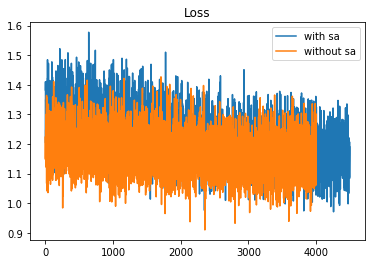

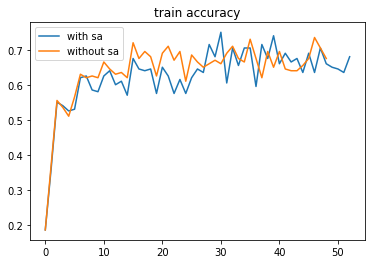

In [31]:
plt.plot(stats_bp_sa['loss_history'][8000:])
plt.plot(stats_bp['loss_history'][8000:])
plt.title('Loss')
plt.legend(['with sa', 'without sa'])
plt.show()

plt.plot(stats_bp_sa['train_acc_history'])
plt.plot(stats_bp['train_acc_history'])
plt.title('train accuracy')
plt.legend(['with sa', 'without sa'])
plt.show()

## Experiment using CNN

In [1]:
from head.neural_net import *
import numpy as np
model = FourLayerConvNet_fast()

In [2]:
N = 50
X = np.random.randn(N, 3, 32, 32)
y = np.random.randint(10, size=N)

loss, grads = model.loss(X, y)
print('Initial loss (no regularization): ', loss)

model.reg = 0.5
loss, grads = model.loss(X, y)
print('Initial loss (with regularization): ', loss)

Initial loss (no regularization):  2.3025851003923394
Initial loss (with regularization):  2.327206920411432


In [3]:
from head.neural_net import *
import numpy as np
from head.utils.solver import Solver

model = FourLayerConvNet_fast()

#num_train = 100
X_train = X_train.reshape((X_train.shape[0], 3, 32, 32))
X_val = X_val.reshape((X_val.shape[0], 3, 32, 32))
X_test = X_test.reshape((X_test.shape[0], 3, 32, 32))

data = {
  'X_train': X_train,
  'y_train': y_train,
  'X_val': X_val,
  'y_val': y_val,
  'X_test': X_test,
  'y_test': y_test
}

solver = Solver(model, data,
                num_epochs=10, batch_size=50,
                update_rule='sgd',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=20)
solver.train()

(50, 3, 32, 32)
(Iteration 1 / 9800) loss: 2.302584
(Epoch 0 / 10) train acc: 0.110000; val_acc: 0.102000
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(Iteration 21 / 9800) loss: 2.302614
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(Iteration 41 / 9800) loss: 2.302586
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50, 3, 32, 32)
(50,

KeyboardInterrupt: 